In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [20]:
import os
from scipy.io.matlab.mio import loadmat, savemat
import numpy as np
from PIL import Image
#####

pathImage = './data/red_eyes/'
pathDescriptors = './data/red_eyes/1r.jpg'

bcomputed = False # Set to False to compute the histogramm database
dataset = []
if not bcomputed:
    listImage = os.listdir(pathImage)
    for imageName in listImage:
        if os.path.isfile(pathImage+imageName) and imageName[-4:] == '.jpg':
            print(imageName)
            # read image
            I = np.array(Image.open(pathImage+imageName)) / 255.
            dataset.append(I)
else:
    print("Histogram database computation already done.")
dataset.pop(0)

C:\Users\xia\AppData\Local\Temp\ipykernel_11888\3768225757.py:2: DeprecationWarning: Please use `loadmat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  from scipy.io.matlab.mio import loadmat, savemat
C:\Users\xia\AppData\Local\Temp\ipykernel_11888\3768225757.py:2: DeprecationWarning: Please use `savemat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  from scipy.io.matlab.mio import loadmat, savemat


1.jpg
10.jpg
10r.jpg
11.jpg
11r.jpg
12.jpg
12r.jpg
13.jpg
13r.jpg
14.jpg
14r.jpg
15.jpg
15r.jpg
16.jpg
16r.jpg
17.jpg
17r.jpg
18.jpg
18r.jpg
19.jpg
19r.jpg
2.jpg
20.jpg
20r.jpg
2r.jpg
3.jpg
3r.jpg
4.jpg
5.jpg
5r.jpg
6.jpg
6r.jpg
7.jpg
7r.jpg
8.jpg
8r.jpg
9.jpg
9r.jpg


array([[[0.11764706, 0.08235294, 0.04705882],
        [0.12156863, 0.08627451, 0.05098039],
        [0.13333333, 0.09803922, 0.0627451 ],
        ...,
        [0.25098039, 0.20784314, 0.12156863],
        [0.20392157, 0.16078431, 0.0745098 ],
        [0.15686275, 0.1254902 , 0.04313725]],

       [[0.12941176, 0.09411765, 0.05882353],
        [0.12941176, 0.09411765, 0.05882353],
        [0.12941176, 0.09411765, 0.05882353],
        ...,
        [0.25098039, 0.20784314, 0.12156863],
        [0.2       , 0.15686275, 0.07058824],
        [0.15686275, 0.11372549, 0.03529412]],

       [[0.14117647, 0.10588235, 0.07058824],
        [0.13333333, 0.09803922, 0.0627451 ],
        [0.12941176, 0.09411765, 0.05882353],
        ...,
        [0.25098039, 0.21176471, 0.11372549],
        [0.20784314, 0.16470588, 0.07843137],
        [0.17254902, 0.12941176, 0.04313725]],

       ...,

       [[0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0

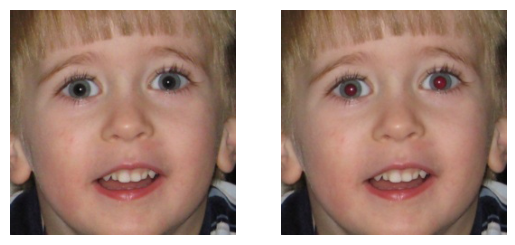

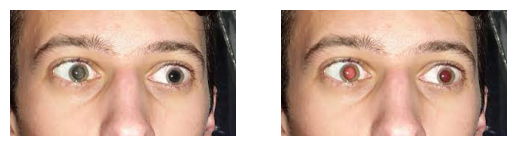

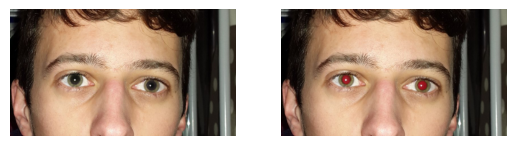

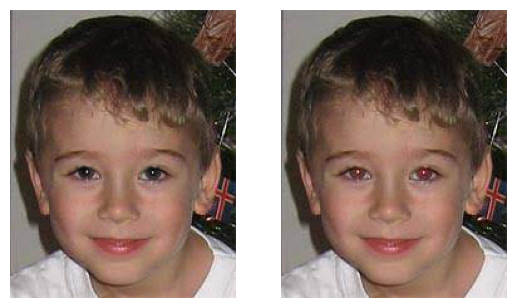

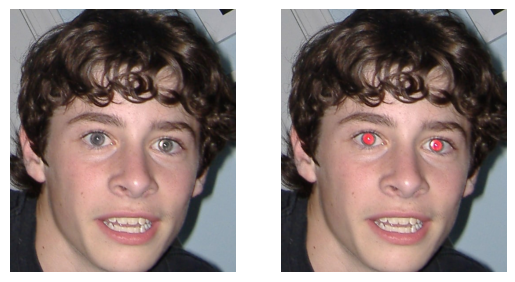

In [23]:
for i in range(0,10,2):
    plt.subplot(1,2,1)
    plt.imshow(dataset[i])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(dataset[i+1])
    plt.axis('off')
    plt.show()

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16096884.09it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<?, ?it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [106]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data)
test_dataloader = DataLoader(test_data)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([1, 1, 28, 28])
Shape of y: torch.Size([1]) torch.int64


In [166]:
from mltools import *
from torch.utils.data import TensorDataset

Xd,yd = gen_arti(data_type=1)
Xt,yt = gen_arti(nbex=400,data_type=1)
yd = np.where(yd < 0,0,1)
yt = np.where(yt < 0,0,1)
mydataset = TensorDataset(torch.Tensor(Xd),torch.Tensor(yd[:,0]).type(torch.LongTensor))
mytestset = TensorDataset(torch.Tensor(Xt),torch.Tensor(yt[:,0]).type(torch.LongTensor))


train_dataloader = DataLoader(mydataset)
test_dataloader = DataLoader(mytestset)


for X, y in test_dataloader:
    print(f"Shape of X [N, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, W]: torch.Size([1, 2])
Shape of y: torch.Size([1]) torch.int64


In [167]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [168]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            #nn.Linear(28*28, 512),
            nn.Linear(2, 100),
            #nn.Conv2d(1,16,3,stride=2),
            #nn.Flatten(),
            nn.ReLU(),
            #nn.Linear(2704 , 512),
            nn.Linear(100 , 40),
            nn.ReLU(),
            #nn.Linear(512, 10)
            nn.Linear(40, 2)
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [169]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=2, bias=True)
  )
)


In [170]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [171]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [172]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [173]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.757804  [    1/ 1000]
loss: 0.694838  [  101/ 1000]
loss: 0.631961  [  201/ 1000]
loss: 0.692202  [  301/ 1000]
loss: 0.544200  [  401/ 1000]
loss: 0.638187  [  501/ 1000]
loss: 0.527083  [  601/ 1000]
loss: 0.591796  [  701/ 1000]
loss: 0.571503  [  801/ 1000]
loss: 0.569767  [  901/ 1000]
Test Error: 
 Accuracy: 99.2%, Avg loss: 0.492214 

Epoch 2
-------------------------------
loss: 0.408241  [    1/ 1000]
loss: 0.423954  [  101/ 1000]
loss: 0.449086  [  201/ 1000]
loss: 0.496799  [  301/ 1000]
loss: 0.413505  [  401/ 1000]
loss: 0.371292  [  501/ 1000]
loss: 0.385725  [  601/ 1000]
loss: 0.432181  [  701/ 1000]
loss: 0.389363  [  801/ 1000]
loss: 0.389141  [  901/ 1000]
Test Error: 
 Accuracy: 99.5%, Avg loss: 0.299723 

Epoch 3
-------------------------------
loss: 0.180750  [    1/ 1000]
loss: 0.224594  [  101/ 1000]
loss: 0.238096  [  201/ 1000]
loss: 0.314934  [  301/ 1000]
loss: 0.246194  [  401/ 1000]
loss: 0.170846  [  501/ 10

In [156]:
print(train_dataloader)

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()